# Learn More About How to Build & Train Neural Networks

 - Learning from Karpathy's Micrograd, try to code it myself.
 - We use scalars instead of tensors to keep things simple. However, tensor operations are just convenient ways to perform batches of scalar operations.#%% md

In [4]:
from tinyflow import Scalar

a = Scalar(1)
b = Scalar(2)
c = a + b
print( c)

c = c * b
print( c)

Scalar(val=3, grad=0)
Scalar(val=6, grad=0)


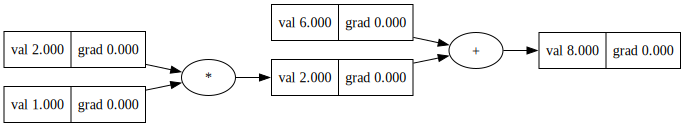

In [5]:
# draw the flow, copy from Karpathy's Micrograd
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})

    for n in nodes:
        dot.node(name=str(id(n)), label = "{ val %.3f | grad %.3f }" % (n.val, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

c = Scalar(6)

d = a * b + c
draw_dot(d)


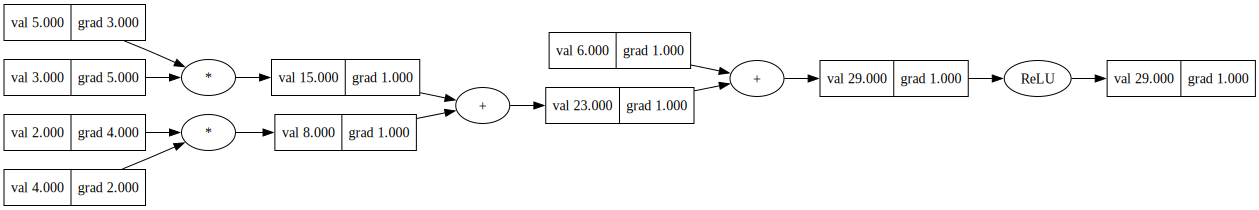

In [6]:
# neural network expression & backpropagation
from tinyflow import Scalar

x1 = Scalar(2.0)
x2 = Scalar(3.0)
w1 = Scalar(4.0)
w2 = Scalar(5.0)
b = Scalar(6.0)

h = x1 * w1 + x2 * w2 + b
y = h.relu()

y.backward()
draw_dot(y)

## Build Neural Network with TinyFlow

In [7]:
import random
from tinyflow import Scalar
from tinyflow import MLP, MSELoss

N, D_in, D_h, D_out = 50, 100, 16, 10

def random_matrix(n, d):
    x = []
    for i in range(n):
        x.append([])
        for j in range(d):
            x[i].append(Scalar(random.random()))  # This is correct
    return x

# random n * d_in Scalar matrix
x = random_matrix(N, D_in)
y = random_matrix(N, D_out)

model = MLP(D_in, [D_h, D_out])
loss_fn = MSELoss()

learning_rate = 1e-3
for t in range(100):
    loss = Scalar(0)
    for i in range(N):
        y_pred = model(x[i])
        loss = loss + loss_fn(y_pred, y[i])

    print(t, loss)
    model.zero_grad()
    loss.backward()
 # with no_grad & update weights
    for p in model.param():
        p.val -= learning_rate * p.grad


0 Scalar(val=2251180.4886865327, grad=0)
1 Scalar(val=240.08475424975447, grad=0)
2 Scalar(val=235.38755453820286, grad=0)
3 Scalar(val=230.78382910091113, grad=0)
4 Scalar(val=226.2717177998215, grad=0)
5 Scalar(val=221.84939751362356, grad=0)
6 Scalar(val=217.515081401121, grad=0)
7 Scalar(val=213.26701817925712, grad=0)
8 Scalar(val=209.1034914155085, grad=0)
9 Scalar(val=205.0228188343584, grad=0)
10 Scalar(val=201.0233516375731, grad=0)
11 Scalar(val=197.10347383800396, grad=0)
12 Scalar(val=193.26160160664622, grad=0)
13 Scalar(val=189.49618263269238, grad=0)
14 Scalar(val=185.80569549632034, grad=0)
15 Scalar(val=182.18864905396208, grad=0)
16 Scalar(val=178.64358183580677, grad=0)
17 Scalar(val=175.1690614552927, grad=0)
18 Scalar(val=171.76368403035093, grad=0)
19 Scalar(val=168.42607361616544, grad=0)
20 Scalar(val=165.15488164922226, grad=0)
21 Scalar(val=161.9487864024212, grad=0)
22 Scalar(val=158.8064924510316, grad=0)
23 Scalar(val=155.72673014927457, grad=0)
24 Scalar(v